In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import random
from sklearn.feature_extraction import text
import nltk
from nltk.corpus import stopwords
from string import punctuation
from nltk import pos_tag
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD

In [0]:
#Setting random seed
np.random.seed(42)
random.seed(42)

# Loading all 20 categories dataet
news_dataset = fetch_20newsgroups(subset='train')
                        
print(type(news_dataset))
print(news_dataset.keys())

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [0]:
print(len(news_dataset.filenames))
print(len(news_dataset.data))

11314
11314


Text(0.5, 1.0, 'Distribution across categories')

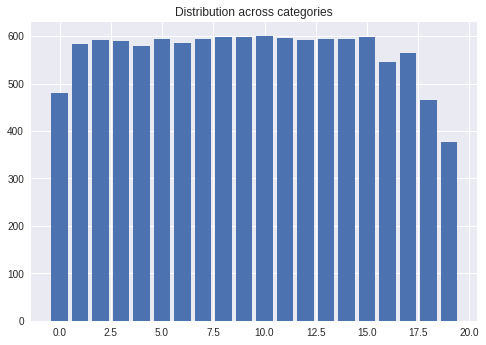

In [0]:
# Q1
# Plotting a histogram to check if data is evenly distributed in all 
# 20 categories
number_of_doc = []
for i in np.unique(news_dataset.target):
    count_target_docs = (np.sum(news_dataset.target == i))
    number_of_doc.append(count_target_docs)


plt.bar(np.unique(news_dataset.target),number_of_doc)
plt.title("Distribution across categories")


In [0]:
# Loads data from news group
# based on categories as parameter
def load_data(categories):
    train_dataset = fetch_20newsgroups(subset = 'train', categories = categories,shuffle = True, random_state = None)
    test_dataset = fetch_20newsgroups(subset = 'test', categories = categories, shuffle = True, random_state = None)
    return train_dataset, test_dataset

In [0]:
# Returns list of all stop words needed
def create_stopwords():
    """stop_words_skt = text.ENGLISH_STOP_WORDS
    # nltk.download('stopwords')
    stop_words_en = stopwords.words('english')

    print("# of stop_words_skt:\t\t %s" % len(stop_words_skt))
    print("# of stop_words_en:\t\t %s" % len(stop_words_en))

    print("# of punctuation:\t\t %s" % len(punctuation))
    combined_stopwords = set.union(set(stop_words_en),set(punctuation),set(stop_words_skt))
    print("# of combined_stopwords:\t %s" % len(combined_stopwords))"""
    combined_stopwords=set(punctuation)
    return combined_stopwords

In [0]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
combined_stopwords = create_stopwords()
analyzer = CountVectorizer().build_analyzer()
wnl = nltk.wordnet.WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try: 
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

def lemmatize_sent_demo(text):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(nltk.word_tokenize(text))]

def lemmatize_sent(list_word):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) for word, tag in pos_tag(list_word)]

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

def stem_rmv_punc(doc):
    return (word for word in lemmatize_sent(analyzer(doc)) if word not in combined_stopwords and not word.isdigit())


In [0]:
lemmatize_sent_demo('He is walking to school')

['he', 'be', 'walk', 'to', 'school']

In [0]:
categories = ['comp.graphics', 'comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
              'rec.autos', 'rec.motorcycles','rec.sport.baseball', 'rec.sport.hockey']
train_dataset,test_dataset = load_data(categories)

In [0]:
# Q2
count_vect = CountVectorizer(min_df=3,analyzer=stem_rmv_punc, stop_words= 'english')
X_train_counts = count_vect.fit_transform(train_dataset.data)
print(X_train_counts.shape)
# print(count_vect.get_feature_names())

X_test_counts = count_vect.transform(test_dataset.data)
print(X_test_counts.shape)

# Calculating the TF-IDF matrix for train and test data
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(X_train_tfidf.shape)

X_test_tfidf = tfidf_transformer.transform(X_test_counts)
print(X_test_tfidf.shape)

(4732, 16600)
(3150, 16600)
(4732, 16600)
(3150, 16600)


In [0]:
# Q3
# Dimension reduction using NMF
def dimension_rediction_NMF(X_train,X_test):
    model = NMF(n_components=50, init='random')
    W_train = model.fit_transform(X_train)
    print(W_train.shape)
    H = model.components_
    print(H.shape)
    print("NMF mean squared residual :",np.sum(np.array(X_train - W_train.dot(H))**2))
    W_test = model.transform(X_test)
    return W_train, W_test

In [0]:
# Dimension reduction using LSI
def dimension_reduction_LSI(X_train, X_test):
    svd = TruncatedSVD(n_components=50)
    X_train_reduced = svd.fit_transform(X_train)
    print(X_train_reduced.shape)
    X_test_reduced = svd.transform(X_test)
    print("LSI mean squared residual :", np.sum(np.array(X_train - X_train_reduced.dot(svd.components_))**2))
    return X_train_reduced, X_test_reduced

In [0]:
X_train_reduced_nmf, X_test_reduced_nmf = dimension_rediction_NMF(X_train_tfidf, X_test_tfidf)
X_train_reduced_lsi, X_test_reduced_lsi = dimension_reduction_LSI(X_train_tfidf, X_test_tfidf)

(4732, 50)
(50, 16600)
NMF mean squared residual : 3939.4265950556155
(4732, 50)
LSI mean squared residual : 3895.3763105101643


In [0]:
#Plotting and Visualisation ROC, Precision, Recall

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import itertools
def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()
    
    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")
    ax.set_title("ROC Curve")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)
        
        
        
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.grid('off')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


def fit_predict_and_plot_roc(pipe, train_data, train_label, test_data, test_label):
    pipe.fit(train_data, train_label)
    # pipeline1.predict(twenty_test.data)

    if hasattr(pipe, 'decision_function'):
        prob_score = pipe.decision_function(test_data)
        fpr, tpr, _ = roc_curve(test_label, prob_score)
    else:
        prob_score = pipe.predict_proba(test_data)
        fpr, tpr, _ = roc_curve(test_label, prob_score[:,1])

    plot_roc(fpr, tpr)

To use the dimension-reduced training data from LSI to
train (different types of) classifiers, and evaluate the trained classifiers with test
data.

**task** : classify the documents into two classes “Computer Technology”
vs “Recreational Activity”


In [0]:
#Combining Data into Two categories
from copy import deepcopy
y_train = train_dataset.target

y_train_new = deepcopy(y_train)
y_train_new[y_train<=3] = 0
y_train_new[y_train>=4] = 1


y_test = test_dataset.target
y_test_new = deepcopy(y_test)
y_test_new[y_test<=3] = 0
y_test_new[y_test>=4] = 1

print(np.unique(y_train_new))
print(np.unique(y_test_new))
print(y_train_new.shape)
print(y_test_new.shape)

[0 1]
[0 1]
(4732,)
(3150,)


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


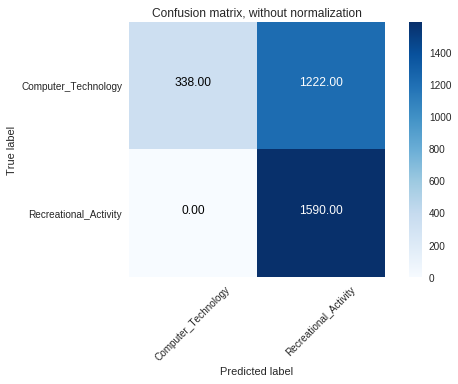

Accurcy =  0.6120634920634921
Precision =  0.5654338549075392
Recall =  1.0
F1 Score =  0.7223989095865516


<Figure size 576x396 with 0 Axes>

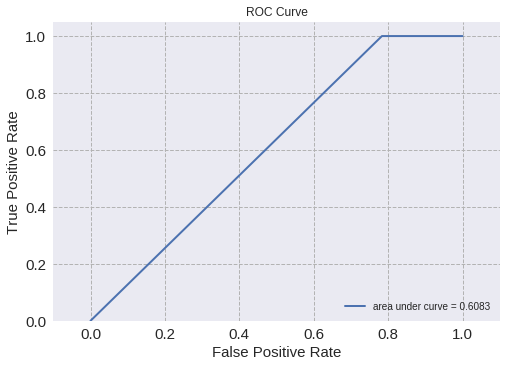

In [0]:
#Create a soft margin svm, plot, and report results
from sklearn.svm import LinearSVC

soft_margin_clf = LinearSVC(C=0.0001)
soft_margin_clf.fit(X_train_reduced_lsi, y_train_new)
predicted_soft_margin = soft_margin_clf.predict(X_test_reduced_lsi)

docs_new= ['Computer_Technology','Recreational_Activity']
cnf_matrix = confusion_matrix(y_test_new, predicted_soft_margin)
plt.figure()
plot_confusion_matrix(cnf_matrix, docs_new,
                      title='Confusion matrix, without normalization')
plt.show()

accuracy_soft = accuracy_score(y_test_new,predicted_soft_margin)
precision_soft = precision_score(y_test_new,predicted_soft_margin)
recall_soft = recall_score(y_test_new,predicted_soft_margin)
f1_soft = f1_score(y_test_new,predicted_soft_margin)

print('Accurcy = ', accuracy_soft)
print('Precision = ',precision_soft)
print('Recall = ', recall_soft)
print('F1 Score = ', f1_soft)

plt.figure()
fpr_soft, tpr_soft, _ = roc_curve(y_test_new, predicted_soft_margin)
plot_roc(fpr_soft, tpr_soft)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


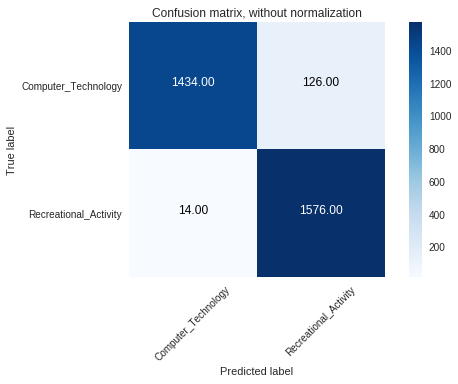

Accuracy =  0.9555555555555556
Precision =  0.9259694477085781
Recall =  0.9911949685534591
F1 Score = 0.9574726609963548


<Figure size 576x396 with 0 Axes>

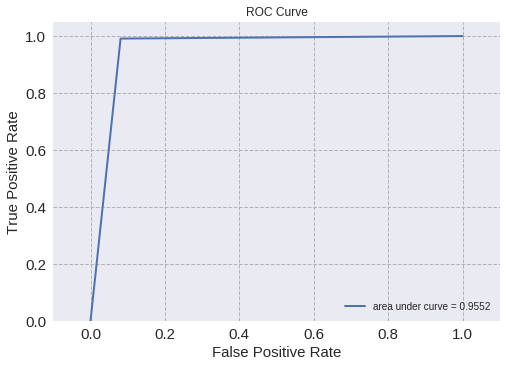

In [0]:
#Create a hard margin svm, plot, and report results
hard_margin_clf = LinearSVC(C=1000)
hard_margin_clf.fit(X_train_reduced_lsi, y_train_new)
predicted_hard_margin = hard_margin_clf.predict(X_test_reduced_lsi)

cnf_matrix = confusion_matrix(y_test_new, predicted_hard_margin)
plt.figure()
plot_confusion_matrix(cnf_matrix, docs_new,
                      title='Confusion matrix, without normalization')
plt.show()

accuracy_hard = accuracy_score(y_test_new,predicted_hard_margin)
precision_hard = precision_score(y_test_new,predicted_hard_margin)
recall_hard = recall_score(y_test_new,predicted_hard_margin)
f1_hard = f1_score(y_test_new,predicted_hard_margin)

print('Accuracy = ',accuracy_hard)
print('Precision = ', precision_hard)
print('Recall = ' , recall_hard)
print('F1 Score =', f1_hard)

plt.figure()
fpr_hard, tpr_hard, _ = roc_curve(y_test_new, predicted_hard_margin)
plot_roc(fpr_hard, tpr_hard)

{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


{'C': 10}


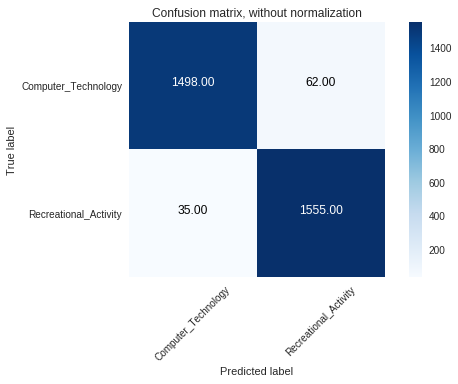

Accuracy =  0.9692063492063492
Precision =  0.9616573902288188
Recall =  0.9779874213836478
F1 Score =  0.9697536638603057


<Figure size 576x396 with 0 Axes>

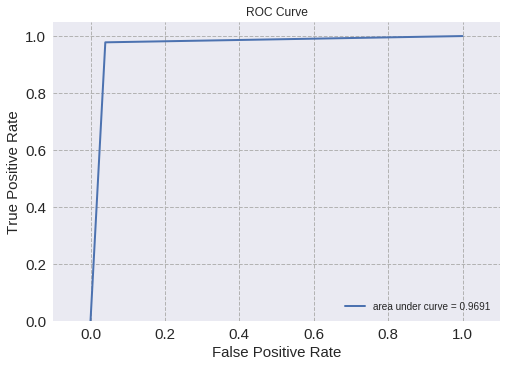

In [0]:
#Grid Search for the best C in SVM with the following parameters, report, and plot results
from sklearn.model_selection import GridSearchCV
parameters_svm = {'C':[10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3]}
print(parameters_svm)
grid_svm = LinearSVC(max_iter = 10000)
grid_svm_clf = GridSearchCV(grid_svm, parameters_svm, cv=5, scoring = 'accuracy')
grid_svm_clf.fit(X_train_reduced_lsi, y_train_new)
print(grid_svm_clf.best_params_)

best_param_svm_predict = grid_svm_clf.predict(X_test_reduced_lsi)
cnf_matrix = confusion_matrix(y_test_new, best_param_svm_predict)
plt.figure()
plot_confusion_matrix(cnf_matrix, docs_new,
                      title='Confusion matrix, without normalization')
plt.show()

accuracy_best_param = accuracy_score(y_test_new,best_param_svm_predict)
precision_best_param = precision_score(y_test_new,best_param_svm_predict)
recall_best_param = recall_score(y_test_new,best_param_svm_predict)
f1_best_param = f1_score(y_test_new,best_param_svm_predict)

print('Accuracy = ', accuracy_best_param)
print('Precision = ', precision_best_param)
print('Recall = ', recall_best_param)
print('F1 Score = ' ,f1_best_param)

plt.figure()
fpr_best_param, tpr_best_param, _ = roc_curve(y_test_new, best_param_svm_predict)
plot_roc(fpr_best_param, tpr_best_param)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


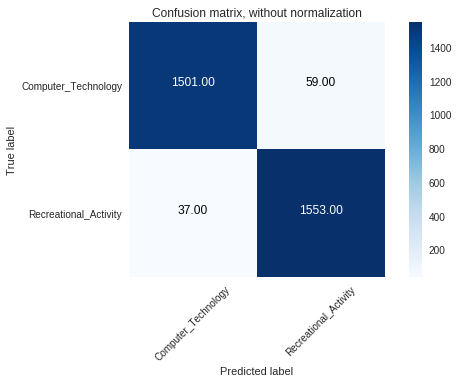

Accuracy =  0.9695238095238096
Precision =  0.9633995037220844
Recall =  0.9767295597484277
F1 Score =  0.9700187382885697


<Figure size 576x396 with 0 Axes>

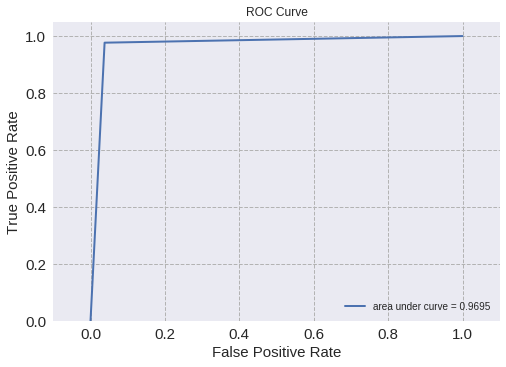

In [0]:
#Create a logistic classifier with no regularization term. Use C as large as possible with L2 regularization because in logistic regression
#the C is the inverse of lambda. So the larger C, the lesser the effect of regularization.
from sklearn.linear_model import LogisticRegression
log_clf_no_reg = LogisticRegression(C=1e60, solver = 'liblinear')
log_clf_no_reg.fit(X_train_reduced_lsi, y_train_new)
predicted_log_no_reg = log_clf_no_reg.predict(X_test_reduced_lsi)

docs_new= ['Computer_Technology','Recreational_Activity']
cnf_matrix = confusion_matrix(y_test_new, predicted_log_no_reg)
plt.figure()
plot_confusion_matrix(cnf_matrix, docs_new,
                      title='Confusion matrix, without normalization')
plt.show()

accuracy_log_no_reg = accuracy_score(y_test_new,predicted_log_no_reg)
precision_log_no_reg = precision_score(y_test_new,predicted_log_no_reg)
recall_log_no_reg = recall_score(y_test_new,predicted_log_no_reg)
f1_log_no_reg = f1_score(y_test_new, predicted_log_no_reg)

print('Accuracy = ', accuracy_log_no_reg)
print('Precision = ', precision_log_no_reg)
print('Recall = ', recall_log_no_reg)
print('F1 Score = ', f1_log_no_reg)

plt.figure()
fpr_log_no_reg, tpr_log_no_reg, _ = roc_curve(y_test_new, predicted_log_no_reg)
plot_roc(fpr_log_no_reg, tpr_log_no_reg)

{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
{'C': 10}


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


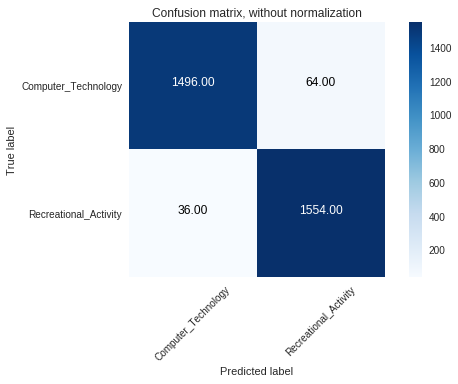

Accuracy =  0.9682539682539683
Precision =  0.9604449938195303
Recall =  0.9773584905660377
F1 Score =  0.9688279301745636


<Figure size 576x396 with 0 Axes>

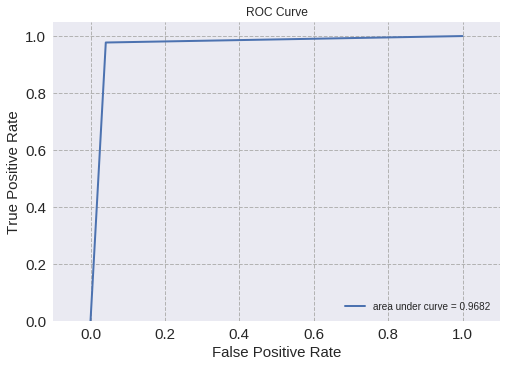

In [0]:
#Grid Search for the best C with Logistic Regression L1 Regularization using the following parameters, report, and plot results

parameters_log = {'C':[10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3]}
print(parameters_svm)
grid_log_l1 = LogisticRegression(penalty = 'l1', solver = 'liblinear')
grid_log_l1_clf = GridSearchCV(grid_log_l1, parameters_log, cv=5, scoring = 'accuracy')
grid_log_l1_clf.fit(X_train_reduced_lsi, y_train_new)
print(grid_log_l1_clf.best_params_)

best_param_log_l1_predict = grid_log_l1_clf.predict(X_test_reduced_lsi)
cnf_matrix = confusion_matrix(y_test_new, best_param_log_l1_predict)
plt.figure()
plot_confusion_matrix(cnf_matrix, docs_new,
                      title='Confusion matrix, without normalization')
plt.show()

accuracy_best_param_log_l1 = accuracy_score(y_test_new,best_param_log_l1_predict)
precision_best_param_log_l1 = precision_score(y_test_new,best_param_log_l1_predict)
recall_best_param_log_l1 = recall_score(y_test_new,best_param_log_l1_predict)
f1_best_param_log_l1 = f1_score(y_test_new,best_param_log_l1_predict)

print('Accuracy = ', accuracy_best_param_log_l1)
print('Precision = ', precision_best_param_log_l1)
print('Recall = ', recall_best_param_log_l1)
print('F1 Score = ', f1_best_param_log_l1)

plt.figure()
fpr_best_param_log_l1, tpr_best_param_log_l1, _ = roc_curve(y_test_new, best_param_log_l1_predict)
plot_roc(fpr_best_param_log_l1, tpr_best_param_log_l1)

{'C': 100}


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


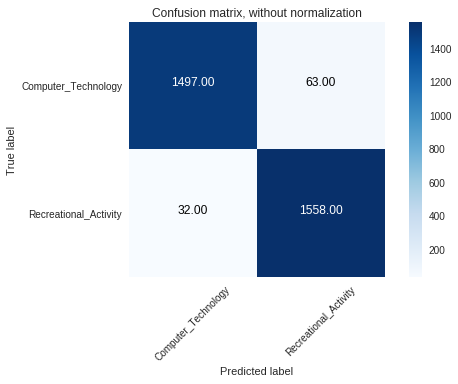

Accuracy =  0.9698412698412698
Precision =  0.9611351017890192
Recall =  0.979874213836478
F1 Score =  0.970414201183432


<Figure size 576x396 with 0 Axes>

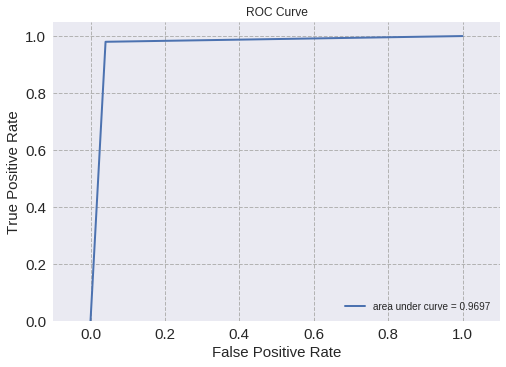

In [0]:
#Grid Search for the best C with Logistic Regression L2 Regularization using the following parameters, report, and plot results

parameters_log = {'C':[10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3]}

grid_log_l2 = LogisticRegression(penalty = 'l2', solver = 'liblinear')
grid_log_l2_clf = GridSearchCV(grid_log_l2, parameters_log, cv=5, scoring = 'accuracy')
grid_log_l2_clf.fit(X_train_reduced_lsi, y_train_new)
print(grid_log_l2_clf.best_params_)

best_param_log_l2_predict = grid_log_l2_clf.predict(X_test_reduced_lsi)
cnf_matrix = confusion_matrix(y_test_new, best_param_log_l2_predict)
plt.figure()
plot_confusion_matrix(cnf_matrix, docs_new,
                      title='Confusion matrix, without normalization')
plt.show()

accuracy_best_param_log_l2 = accuracy_score(y_test_new,best_param_log_l2_predict)
precision_best_param_log_l2 = precision_score(y_test_new,best_param_log_l2_predict)
recall_best_param_log_l2 = recall_score(y_test_new,best_param_log_l2_predict)
f1_best_param_log_l2 = f1_score(y_test_new,best_param_log_l2_predict)

print('Accuracy = ', accuracy_best_param_log_l2)
print('Precision = ', precision_best_param_log_l2)
print('Recall = ', recall_best_param_log_l2)
print('F1 Score = ', f1_best_param_log_l2)

plt.figure()
fpr_best_param_log_l2, tpr_best_param_log_l2, _ = roc_curve(y_test_new, best_param_log_l2_predict)
plot_roc(fpr_best_param_log_l2, tpr_best_param_log_l2)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


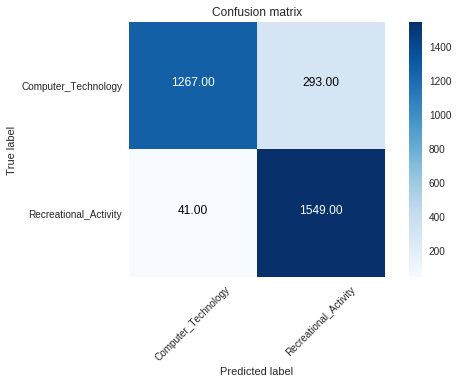

0.893968253968254
0.8409337676438654
0.9742138364779874
0.9026806526806527


<Figure size 576x396 with 0 Axes>

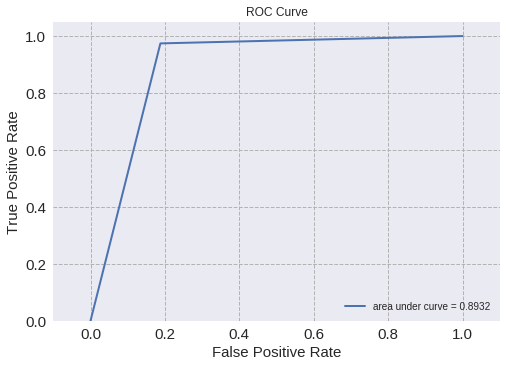

In [0]:
#QUESTION 6: Naïve Bayes classifier: train a GaussianNB classifier; plot the ROC curve and
#report the confusion matrix and calculate the accuracy, recall, precision and F-1 score of this classifier.


from sklearn.naive_bayes import GaussianNB

gaussianNB_clf = GaussianNB()
gaussianNB_clf.fit(X_train_reduced_lsi, y_train_new)
predicted_gaussianNB = gaussianNB_clf.predict(X_test_reduced_lsi)

cnf_matrix = confusion_matrix(y_test_new, predicted_gaussianNB)
plt.figure()
plot_confusion_matrix(cnf_matrix, docs_new,
                      title='Confusion matrix')
plt.show()

accuracy_gaussianNB = accuracy_score(y_test_new,predicted_gaussianNB)
precision_gaussianNB = precision_score(y_test_new,predicted_gaussianNB)
recall_gaussianNB = recall_score(y_test_new,predicted_gaussianNB)
f1_gaussianNB = f1_score(y_test_new,predicted_gaussianNB)

print(accuracy_gaussianNB)
print(precision_gaussianNB)
print(recall_gaussianNB)
print(f1_gaussianNB)

plt.figure()
fpr_gaussianNB, tpr_gaussianNB, _ = roc_curve(y_test_new, predicted_gaussianNB)
plot_roc(fpr_gaussianNB, tpr_gaussianNB)



In [0]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('vect', CountVectorizer(min_df=1, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50)),
    ('clf', GaussianNB()),
])
pipeline.fit(train_dataset.data, train_dataset.target)
predict = pipeline.predict(test_dataset.data)
print("accuracy:{}".format(accuracy_score(test_dataset.target, predict)))

accuracy:0.6257142857142857


In [0]:
#remove header and footer from data
train_dataset_rem = fetch_20newsgroups(subset = 'train', categories = categories, shuffle = True, random_state = None,remove=('headers','footers'))
test_dataset_rem= fetch_20newsgroups(subset = 'test', categories = categories, shuffle = True, random_state = None,remove=('headers','footers'))
    


In [0]:
#Q7 Construct a Pipeline that performs feature extraction, dimensionality reduction and classification
#Do grid search with 5-fold cross-validation to compare the following (use test accuracy as the
#score to compare)

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.externals.joblib import Memory

cachedir1 = mkdtemp()
memory = Memory(cachedir=cachedir1, verbose=10)

pipeline = Pipeline([
    ('vect', CountVectorizer(min_df=1, analyzer= stem_rmv_punc, stop_words= 'english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', NMF(n_components=50, init='random')),
    ('clf', GaussianNB()),
     ],memory=memory)

param_grid = [
    {
        'vect__min_df':[3,5],
        'vect__analyzer': ['word',stem_rmv_punc],    #with lemmetization/without
        'reduce_dim': [TruncatedSVD(n_components=50), NMF(n_components=50, init='random')],
        'clf': [LinearSVC(),
                LogisticRegression(penalty = 'l1', solver = 'liblinear'),
                LogisticRegression(penalty = 'l2', solver = 'liblinear')
                ],
        'clf__C':[10**1]
    },
    {
        'vect__min_df':[3,5],
        'vect__analyzer': ['word',stem_rmv_punc],    #with lemmetization/without
        'reduce_dim': [TruncatedSVD(n_components=50), NMF(n_components=50, init='random')],
        'clf': [GaussianNB()],        
    }
]

stemmer = nltk.stem.PorterStemmer()
grid1 = GridSearchCV(pipeline, cv=5, n_jobs=1, param_grid=param_grid, scoring='accuracy')
grid1.fit(train_dataset.data, train_dataset.target)
print(grid1.best_params_)
rmtree(cachedir1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='/tmp/tmpqimpbbgg'", use "location='/tmp/tmpqimpbbgg'" instead.
  if __name__ == '__main__':


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stemmed_words at 0x7fc647fcbe18>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=3, ngram_range=(1, 1), preprocessor=None,
        stop_words='english', strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None), 
[ 'From: dcoleman@utxvms.cc.utexas.edu (Daniel M. Coleman)\n'
  'Subject: Re: MathCad 4.0 swap file\n'
  'Lines: 28\n'
  'Nntp-Posting-Host: blonde.cc.utexas.edu\n'
  'Organization: The University of Texas at Austin\n'
  'Lines: 28\n'
  '\n'
  'In article <1993Apr20.175608.23949@ncar.ucar.edu>, '
  'baseball@catch-the-fever.scd.ucar.edu (Gregg Walters) writes:\n'
  '> I have 16MB of memory on my 386SX.  I have been running

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 2.40s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 22.2s, 0.4min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3783x14661 sparse matrix of type '<class 'numpy.int64'>'
	with 460416 stored elements in Compressed Sparse Row format>, 
array([1, ..., 2]), None)
________________________________________________fit_transform_one - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 
<3783x14661 sparse matrix of type '<class 'numpy.float64'>'
	with 460416 stored elements in Compressed Sparse Row format>, 
array([1, ..., 2]), None)
_______________________________________________

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 2.37s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 21.9s, 0.4min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3784x14448 sparse matrix of type '<class 'numpy.int64'>'
	with 455570 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2]), None)
________________________________________________fit_transform_one - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 
<3784x14448 sparse matrix of type '<class 'numpy.float64'>'
	with 455570 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2]), None)
_______________________________________________

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 2.37s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 22.0s, 0.4min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x14730 sparse matrix of type '<class 'numpy.int64'>'
	with 459971 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2]), None)
________________________________________________fit_transform_one - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 
<3785x14730 sparse matrix of type '<class 'numpy.float64'>'
	with 459971 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2]), None)
_______________________________________________

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 2.34s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 21.9s, 0.4min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3787x14399 sparse matrix of type '<class 'numpy.int64'>'
	with 459269 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2]), None)
________________________________________________fit_transform_one - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 
<3787x14399 sparse matrix of type '<class 'numpy.float64'>'
	with 459269 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2]), None)
_______________________________________________

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 2.38s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 22.0s, 0.4min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3789x14584 sparse matrix of type '<class 'numpy.int64'>'
	with 461320 stored elements in Compressed Sparse Row format>, 
array([6, ..., 6]), None)
________________________________________________fit_transform_one - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 
<3789x14584 sparse matrix of type '<class 'numpy.float64'>'
	with 461320 stored elements in Compressed Sparse Row format>, 
array([6, ..., 6]), None)
_______________________________________________

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.70s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 22.1s, 0.4min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3783x9360 sparse matrix of type '<class 'numpy.int64'>'
	with 442547 stored elements in Compressed Sparse Row format>, 
array([1, ..., 2]), None)
________________________________________________fit_transform_one - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 
<3783x9360 sparse matrix of type '<class 'numpy.float64'>'
	with 442547 stored elements in Compressed Sparse Row format>, 
array([1, ..., 2]), None)
________________________________________________f

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.54s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 21.6s, 0.4min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3784x9323 sparse matrix of type '<class 'numpy.int64'>'
	with 438263 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2]), None)
________________________________________________fit_transform_one - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 
<3784x9323 sparse matrix of type '<class 'numpy.float64'>'
	with 438263 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2]), None)
________________________________________________f

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.69s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 21.9s, 0.4min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x9361 sparse matrix of type '<class 'numpy.int64'>'
	with 441892 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2]), None)
________________________________________________fit_transform_one - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 
<3785x9361 sparse matrix of type '<class 'numpy.float64'>'
	with 441892 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2]), None)
________________________________________________f

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.70s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 21.6s, 0.4min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3787x9400 sparse matrix of type '<class 'numpy.int64'>'
	with 442356 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2]), None)
________________________________________________fit_transform_one - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 
<3787x9400 sparse matrix of type '<class 'numpy.float64'>'
	with 442356 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2]), None)
________________________________________________f

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.74s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 21.9s, 0.4min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3789x9452 sparse matrix of type '<class 'numpy.int64'>'
	with 443977 stored elements in Compressed Sparse Row format>, 
array([6, ..., 6]), None)
________________________________________________fit_transform_one - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 
<3789x9452 sparse matrix of type '<class 'numpy.float64'>'
	with 443977 stored elements in Compressed Sparse Row format>, 
array([6, ..., 6]), None)
________________________________________________f

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 2.35s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 62.4s, 1.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3783x14444 sparse matrix of type '<class 'numpy.int64'>'
	with 430106 stored elements in Compressed Sparse Row format>, 
array([1, ..., 2]), None)
________________________________________________fit_transform_one - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 
<3783x14444 sparse matrix of type '<class 'numpy.float64'>'
	with 430106 stored elements in Compressed Sparse Row format>, 
array([1, ..., 2]), None)
_______________________________________________

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 2.10s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 60.7s, 1.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3784x14105 sparse matrix of type '<class 'numpy.int64'>'
	with 424899 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2]), None)
________________________________________________fit_transform_one - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 
<3784x14105 sparse matrix of type '<class 'numpy.float64'>'
	with 424899 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2]), None)
_______________________________________________

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 2.49s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 61.8s, 1.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x14508 sparse matrix of type '<class 'numpy.int64'>'
	with 429717 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2]), None)
________________________________________________fit_transform_one - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 
<3785x14508 sparse matrix of type '<class 'numpy.float64'>'
	with 429717 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2]), None)
_______________________________________________

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 2.29s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 61.3s, 1.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3787x14099 sparse matrix of type '<class 'numpy.int64'>'
	with 428579 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2]), None)
________________________________________________fit_transform_one - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 
<3787x14099 sparse matrix of type '<class 'numpy.float64'>'
	with 428579 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2]), None)
_______________________________________________

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 2.20s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 61.0s, 1.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3789x14306 sparse matrix of type '<class 'numpy.int64'>'
	with 430998 stored elements in Compressed Sparse Row format>, 
array([6, ..., 6]), None)
________________________________________________fit_transform_one - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 
<3789x14306 sparse matrix of type '<class 'numpy.float64'>'
	with 430998 stored elements in Compressed Sparse Row format>, 
array([6, ..., 6]), None)
_______________________________________________

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.55s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 63.2s, 1.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3783x9157 sparse matrix of type '<class 'numpy.int64'>'
	with 412283 stored elements in Compressed Sparse Row format>, 
array([1, ..., 2]), None)
________________________________________________fit_transform_one - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 
<3783x9157 sparse matrix of type '<class 'numpy.float64'>'
	with 412283 stored elements in Compressed Sparse Row format>, 
array([1, ..., 2]), None)
________________________________________________f

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.66s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 61.8s, 1.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3784x9056 sparse matrix of type '<class 'numpy.int64'>'
	with 407838 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2]), None)
________________________________________________fit_transform_one - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 
<3784x9056 sparse matrix of type '<class 'numpy.float64'>'
	with 407838 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2]), None)
________________________________________________f

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.68s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 62.5s, 1.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x9142 sparse matrix of type '<class 'numpy.int64'>'
	with 411668 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2]), None)
________________________________________________fit_transform_one - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 
<3785x9142 sparse matrix of type '<class 'numpy.float64'>'
	with 411668 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2]), None)
________________________________________________f

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.53s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 62.0s, 1.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3787x9159 sparse matrix of type '<class 'numpy.int64'>'
	with 411837 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2]), None)
________________________________________________fit_transform_one - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 
<3787x9159 sparse matrix of type '<class 'numpy.float64'>'
	with 411837 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2]), None)
________________________________________________f

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.71s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 61.5s, 1.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3789x9263 sparse matrix of type '<class 'numpy.int64'>'
	with 413943 stored elements in Compressed Sparse Row format>, 
array([6, ..., 6]), None)
________________________________________________fit_transform_one - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 
<3789x9263 sparse matrix of type '<class 'numpy.float64'>'
	with 413943 stored elements in Compressed Sparse Row format>, 
array([6, ..., 6]), None)
________________________________________________f

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/b134e72b9c6673c2e673cac3964b4e8e
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/86cc6e91e3d1aa4d09fdb4192526e583
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/d5b7bdb3ab682dc0a3441799fd0b11a8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/442edf07d615d88fdc5f048ed562b3c7
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/0bdc92e685c1c1ee01c28dc5e276c4b8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/651c06837d866f2ac32da8001764bd2a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/e6143810e3faa429719f77ebcd645cfc
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/d17242f3c30f5c58ba27d3fd68082d49
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/6dbfc4103f9683c5c5b34c97593fbf6b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/6a9265ec06caa6c83edfb62cf1f1c4f3
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/b84cf9ef3268127edfdf8310638d7ab3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/1ce8417a9084ecb01592bcde0590e5c0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/399cab5cc3e948ace7651f74f3254e35
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/f3d1b62444082d37d82f6b75598460f6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/172b4aeecc79401e923a75f93e365ed4
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/4734c95f29672ca51493eecd9758985a
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/18d52925c12b15f5e0674a329ebb7af9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/330bc3c0ab21757aa75d37de31452315
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/d0ebdf4d8cfa69375e9a921a9b6caa44
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/9bb55a34243db4895ce293541993b9bf
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/c70fc3286fa4756b46c63078efd12184
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/0cb59401e01fd77072e97ecf30b5ffa9
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/1506bdf03d9bccdc7ee3e5ae4831fc65
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/27826bd6fd8085b3f27c862b75e4e0d7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/ac54fe3b801523d4b0f734b06bcf34fb
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/2efc3b1682c03024f923585b55bd7295
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/102aa5fdfa50a1cd1549a8c9d1f55757
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/bd4900844dfcf2226e55f9a051d656f1
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/ef42979b42e64624b9dad115d1b8cb24
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/7fd5ad816ec6d5e0f95d1ea7c5b9260b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/21f2d0a6a3b910417c949cd6f911d89d
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/d7c68419fb5f8d2c8ffcdfc158419b9f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/9d223e188b6d2eb11e98fda36f657d4e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/970e92a1b5c0887d47548aeaa3077152
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/baf216811ba31fa16931afd2579fd413
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/51dcea70e1b4ca47d20fbb0da745f86d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/6c143d3282e48612f9b4d4e1ac28ee1b
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/2a5924cd605af9877e38c83f2b46a74b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/b5d5c7ac3ff5d94517c0b0f8cd6d5f36
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/cac7023af55b4207724ded585d952a3b
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/926b773eeafb7fb4e2355488285cb02c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/e07d38b226000161b508b720973ae37e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/5085224ffc337638e684fc804cd573a4
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/6570a7b614201a7a822e9a4866e42817
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/887fae7f9a557da21b42ca2bf37e0bda
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/17bdde0a5b60dd978e21d2d5dba59a22
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/a8a68b4e1928b7a72bfb44ffc9811357
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/d4ff5839a4b390c5b71c520af8ef0e63
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/6d4e136836762321251db6367f92c15b
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/ec1be565879022ebf2e46b4d2d58056f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/f149d6cc15a01c41bdaa6b76c6e3bab3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/3b354d484ab35096974afeb602593071
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/9b755c6c170697aaa049e33341a54365
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/1771ba043ab8ac09bf9bfb2c8e6a3886
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/9f228e8391249b30b8be73ccbd3fb294
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/e980299b82a616e3605030289362544f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/5e9781c570e3af79a543456bca820125
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/480077f9cab9743b0571e81d353f252c
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/a6216ed7075d2c04cd4a90d7c814cbdd
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/676a32c009b836d3ab3520c11045e307
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/b134e72b9c6673c2e673cac3964b4e8e
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/86cc6e91e3d1aa4d09fdb4192526e583
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/de2cdf492a00e7a63063fa0c59a55368
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/442edf07d615d88fdc5f048ed562b3c7
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/0bdc92e685c1c1ee01c28dc5e276c4b8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/daacf9daff6daa8343557bf0ee7781f9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/e6143810e3faa429719f77ebcd645cfc
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/d17242f3c30f5c58ba27d3fd68082d49
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/f93e67ae12ecef2186232ed758b561ec
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/6a9265ec06caa6c83edfb62cf1f1c4f3
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/b84cf9ef3268127edfdf8310638d7ab3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/3271f99b7c890368543cd78c9654047e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/399cab5cc3e948ace7651f74f3254e35
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/f3d1b62444082d37d82f6b75598460f6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/851f37cb8c5b07ae8c36d047c68a89a4
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/4734c95f29672ca51493eecd9758985a
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/18d52925c12b15f5e0674a329ebb7af9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/20c9c62b8dd41572d21b8a0beb9bf159
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/d0ebdf4d8cfa69375e9a921a9b6caa44
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/9bb55a34243db4895ce293541993b9bf
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/7d2d481bcf75ba1a7eb6323cff1f2f09
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/0cb59401e01fd77072e97ecf30b5ffa9
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/1506bdf03d9bccdc7ee3e5ae4831fc65
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/91d72b3ba84b1561dfa1110da70bd4e8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/ac54fe3b801523d4b0f734b06bcf34fb
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/2efc3b1682c03024f923585b55bd7295
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/74e2ce46d76c00bed7fb4245a2881184
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/bd4900844dfcf2226e55f9a051d656f1
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/ef42979b42e64624b9dad115d1b8cb24
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/487bcf21489af74b4ba996dedc5f3236
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/21f2d0a6a3b910417c949cd6f911d89d
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/d7c68419fb5f8d2c8ffcdfc158419b9f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/5aeb53e9ff5eeb57388389114a34151e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/970e92a1b5c0887d47548aeaa3077152
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/baf216811ba31fa16931afd2579fd413
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/dc74e2aa0bd1b745628c20645b2d6deb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/6c143d3282e48612f9b4d4e1ac28ee1b
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/2a5924cd605af9877e38c83f2b46a74b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/e61a366ded3c5e0779198b8b3da3ea66
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/cac7023af55b4207724ded585d952a3b
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/926b773eeafb7fb4e2355488285cb02c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/3a32161504c3724acac575c65d66db56
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/5085224ffc337638e684fc804cd573a4
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/6570a7b614201a7a822e9a4866e42817
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/0dcf55719af150742c4bfe24305d7ce4
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/17bdde0a5b60dd978e21d2d5dba59a22
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/a8a68b4e1928b7a72bfb44ffc9811357
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/0bdf0d97229a3ea6cacd79e7df698704
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/6d4e136836762321251db6367f92c15b
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/ec1be565879022ebf2e46b4d2d58056f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/1a34b13b6fb9a07de39d9811ea29fc52
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/3b354d484ab35096974afeb602593071
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/9b755c6c170697aaa049e33341a54365
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/f8d333232cfd8ff607d630287569c8fd
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/9f228e8391249b30b8be73ccbd3fb294
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/e980299b82a616e3605030289362544f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/854674186cc052927095a5c091ab257a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/480077f9cab9743b0571e81d353f252c
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/a6216ed7075d2c04cd4a90d7c814cbdd
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/131cfa175b814cd00310263474ae4f03
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/b134e72b9c6673c2e673cac3964b4e8e
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/86cc6e91e3d1aa4d09fdb4192526e583
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/d5b7bdb3ab682dc0a3441799fd0b11a8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/442edf07d615d88fdc5f048ed562b3c7
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/0bdc92e685c1c1ee01c28dc5e276c4b8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/651c06837d866f2ac32da8001764bd2a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/e6143810e3faa429719f77ebcd645cfc
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/d17242f3c30f5c58ba27d3fd68082d49
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/6dbfc4103f9683c5c5b34c97593fbf6b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/6a9265ec06caa6c83edfb62cf1f1c4f3
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/b84cf9ef3268127edfdf8310638d7ab3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/1ce8417a9084ecb01592bcde0590e5c0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/399cab5cc3e948ace7651f74f3254e35
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/f3d1b62444082d37d82f6b75598460f6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/172b4aeecc79401e923a75f93e365ed4
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/4734c95f29672ca51493eecd9758985a
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/18d52925c12b15f5e0674a329ebb7af9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/330bc3c0ab21757aa75d37de31452315
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/d0ebdf4d8cfa69375e9a921a9b6caa44
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/9bb55a34243db4895ce293541993b9bf
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/c70fc3286fa4756b46c63078efd12184
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/0cb59401e01fd77072e97ecf30b5ffa9
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/1506bdf03d9bccdc7ee3e5ae4831fc65
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/27826bd6fd8085b3f27c862b75e4e0d7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/ac54fe3b801523d4b0f734b06bcf34fb
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/2efc3b1682c03024f923585b55bd7295
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/102aa5fdfa50a1cd1549a8c9d1f55757
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/bd4900844dfcf2226e55f9a051d656f1
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/ef42979b42e64624b9dad115d1b8cb24
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/7fd5ad816ec6d5e0f95d1ea7c5b9260b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/21f2d0a6a3b910417c949cd6f911d89d
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/d7c68419fb5f8d2c8ffcdfc158419b9f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/9d223e188b6d2eb11e98fda36f657d4e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/970e92a1b5c0887d47548aeaa3077152
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/baf216811ba31fa16931afd2579fd413
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/51dcea70e1b4ca47d20fbb0da745f86d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/6c143d3282e48612f9b4d4e1ac28ee1b
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/2a5924cd605af9877e38c83f2b46a74b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/b5d5c7ac3ff5d94517c0b0f8cd6d5f36
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/cac7023af55b4207724ded585d952a3b
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/926b773eeafb7fb4e2355488285cb02c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/e07d38b226000161b508b720973ae37e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/5085224ffc337638e684fc804cd573a4
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/6570a7b614201a7a822e9a4866e42817
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/887fae7f9a557da21b42ca2bf37e0bda
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/17bdde0a5b60dd978e21d2d5dba59a22
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/a8a68b4e1928b7a72bfb44ffc9811357
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/d4ff5839a4b390c5b71c520af8ef0e63
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/6d4e136836762321251db6367f92c15b
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/ec1be565879022ebf2e46b4d2d58056f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/f149d6cc15a01c41bdaa6b76c6e3bab3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/3b354d484ab35096974afeb602593071
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/9b755c6c170697aaa049e33341a54365
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/1771ba043ab8ac09bf9bfb2c8e6a3886
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/9f228e8391249b30b8be73ccbd3fb294
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/e980299b82a616e3605030289362544f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/5e9781c570e3af79a543456bca820125
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/480077f9cab9743b0571e81d353f252c
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/a6216ed7075d2c04cd4a90d7c814cbdd
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/676a32c009b836d3ab3520c11045e307
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/b134e72b9c6673c2e673cac3964b4e8e
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/86cc6e91e3d1aa4d09fdb4192526e583
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/de2cdf492a00e7a63063fa0c59a55368
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/442edf07d615d88fdc5f048ed562b3c7
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/0bdc92e685c1c1ee01c28dc5e276c4b8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/daacf9daff6daa8343557bf0ee7781f9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/e6143810e3faa429719f77ebcd645cfc
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/d17242f3c30f5c58ba27d3fd68082d49
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/f93e67ae12ecef2186232ed758b561ec
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/6a9265ec06caa6c83edfb62cf1f1c4f3
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/b84cf9ef3268127edfdf8310638d7ab3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/3271f99b7c890368543cd78c9654047e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/399cab5cc3e948ace7651f74f3254e35
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/f3d1b62444082d37d82f6b75598460f6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/851f37cb8c5b07ae8c36d047c68a89a4
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/4734c95f29672ca51493eecd9758985a
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/18d52925c12b15f5e0674a329ebb7af9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/20c9c62b8dd41572d21b8a0beb9bf159
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/d0ebdf4d8cfa69375e9a921a9b6caa44
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/9bb55a34243db4895ce293541993b9bf
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/7d2d481bcf75ba1a7eb6323cff1f2f09
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/0cb59401e01fd77072e97ecf30b5ffa9
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/1506bdf03d9bccdc7ee3e5ae4831fc65
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/91d72b3ba84b1561dfa1110da70bd4e8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/ac54fe3b801523d4b0f734b06bcf34fb
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/2efc3b1682c03024f923585b55bd7295
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/74e2ce46d76c00bed7fb4245a2881184
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/bd4900844dfcf2226e55f9a051d656f1
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/ef42979b42e64624b9dad115d1b8cb24
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/487bcf21489af74b4ba996dedc5f3236
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/21f2d0a6a3b910417c949cd6f911d89d
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/d7c68419fb5f8d2c8ffcdfc158419b9f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/5aeb53e9ff5eeb57388389114a34151e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/970e92a1b5c0887d47548aeaa3077152
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/baf216811ba31fa16931afd2579fd413
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/dc74e2aa0bd1b745628c20645b2d6deb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/6c143d3282e48612f9b4d4e1ac28ee1b
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/2a5924cd605af9877e38c83f2b46a74b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/e61a366ded3c5e0779198b8b3da3ea66
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/cac7023af55b4207724ded585d952a3b
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/926b773eeafb7fb4e2355488285cb02c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/3a32161504c3724acac575c65d66db56
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/5085224ffc337638e684fc804cd573a4
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/6570a7b614201a7a822e9a4866e42817
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/0dcf55719af150742c4bfe24305d7ce4
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/17bdde0a5b60dd978e21d2d5dba59a22
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/a8a68b4e1928b7a72bfb44ffc9811357
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/0bdf0d97229a3ea6cacd79e7df698704
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/6d4e136836762321251db6367f92c15b
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/ec1be565879022ebf2e46b4d2d58056f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/1a34b13b6fb9a07de39d9811ea29fc52
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/3b354d484ab35096974afeb602593071
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/9b755c6c170697aaa049e33341a54365
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/f8d333232cfd8ff607d630287569c8fd
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/9f228e8391249b30b8be73ccbd3fb294
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/e980299b82a616e3605030289362544f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/854674186cc052927095a5c091ab257a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/480077f9cab9743b0571e81d353f252c
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/a6216ed7075d2c04cd4a90d7c814cbdd
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/131cfa175b814cd00310263474ae4f03
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/b134e72b9c6673c2e673cac3964b4e8e
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbb

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 2.88s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 27.3s, 0.5min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <4732x16904 sparse matrix of type '<class 'numpy.int64'>'
	with 579420 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2]), None)
________________________________________________fit_transform_one - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 
<4732x16904 sparse matrix of type '<class 'numpy.float64'>'
	with 579420 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2]), None)
_______________________________________________

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


{'clf': LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False), 'clf__C': 10, 'reduce_dim': TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 'vect__analyzer': <function stemmed_words at 0x7fc647fcbe18>, 'vect__min_df': 3}


In [0]:
#without header and footer
grid2 = GridSearchCV(pipeline, cv=5, n_jobs=1, param_grid=param_grid, scoring='accuracy')
grid2.fit(train_dataset_rem.data, train_dataset_rem.target)
print(grid2.best_params_)
print(grid1.best_params_)

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stemmed_words at 0x7fc647fcbe18>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=3, ngram_range=(1, 1), preprocessor=None,
        stop_words='english', strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None), 
[ 'In article <1993Apr15.035406.29988@rd.hydro.on.ca> jlevine@rd.hydro.on.ca '
  '(Jody Levine) writes:\n'
  '\n'
  'impertinent stuff deleted\n'
  '>\n'
  '>Am I showing my Canadian University-ness here, of does anyone else know\n'
  ">what I'm talking about?\n"
  '>\n'
  ">I've        bike                      like       | Jody Levine  DoD #275 "
  'kV\n'
  '>     got a       you can        if you      -PF  | '
  'Jody.P

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 2.01s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 17.7s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3783x12041 sparse matrix of type '<class 'numpy.int64'>'
	with 359399 stored elements in Compressed Sparse Row format>, 
array([5, ..., 0]), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 
<3783x12041 sparse matrix of type '<class 'numpy.float64'>'
	with 359399 stored elements in Compressed Sparse Row format>, 
array([5, ..., 0]), None)
_______________________________________________

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.89s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 18.1s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3784x12347 sparse matrix of type '<class 'numpy.int64'>'
	with 365546 stored elements in Compressed Sparse Row format>, 
array([7, ..., 0]), None)
________________________________________________fit_transform_one - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 
<3784x12347 sparse matrix of type '<class 'numpy.float64'>'
	with 365546 stored elements in Compressed Sparse Row format>, 
array([7, ..., 0]), None)
_______________________________________________

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 2.04s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 17.9s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x12380 sparse matrix of type '<class 'numpy.int64'>'
	with 362503 stored elements in Compressed Sparse Row format>, 
array([7, ..., 0]), None)
________________________________________________fit_transform_one - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 
<3785x12380 sparse matrix of type '<class 'numpy.float64'>'
	with 362503 stored elements in Compressed Sparse Row format>, 
array([7, ..., 0]), None)
_______________________________________________

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.90s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 17.2s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3787x11622 sparse matrix of type '<class 'numpy.int64'>'
	with 355592 stored elements in Compressed Sparse Row format>, 
array([7, ..., 0]), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 
<3787x11622 sparse matrix of type '<class 'numpy.float64'>'
	with 355592 stored elements in Compressed Sparse Row format>, 
array([7, ..., 0]), None)
_______________________________________________

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.99s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 17.3s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3789x11956 sparse matrix of type '<class 'numpy.int64'>'
	with 356427 stored elements in Compressed Sparse Row format>, 
array([7, ..., 4]), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 
<3789x11956 sparse matrix of type '<class 'numpy.float64'>'
	with 356427 stored elements in Compressed Sparse Row format>, 
array([7, ..., 4]), None)
_______________________________________________

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.44s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 17.7s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3783x7562 sparse matrix of type '<class 'numpy.int64'>'
	with 344370 stored elements in Compressed Sparse Row format>, 
array([5, ..., 0]), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 
<3783x7562 sparse matrix of type '<class 'numpy.float64'>'
	with 344370 stored elements in Compressed Sparse Row format>, 
array([5, ..., 0]), None)
________________________________________________f

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.34s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 18.2s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3784x7950 sparse matrix of type '<class 'numpy.int64'>'
	with 350747 stored elements in Compressed Sparse Row format>, 
array([7, ..., 0]), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 
<3784x7950 sparse matrix of type '<class 'numpy.float64'>'
	with 350747 stored elements in Compressed Sparse Row format>, 
array([7, ..., 0]), None)
________________________________________________f

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 17.9s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x7766 sparse matrix of type '<class 'numpy.int64'>'
	with 346944 stored elements in Compressed Sparse Row format>, 
array([7, ..., 0]), None)
________________________________________________fit_transform_one - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 
<3785x7766 sparse matrix of type '<class 'numpy.float64'>'
	with 346944 stored elements in Compressed Sparse Row format>, 
array([7, ..., 0]), None)
________________________________________________f

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.21s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 17.2s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3787x7399 sparse matrix of type '<class 'numpy.int64'>'
	with 341351 stored elements in Compressed Sparse Row format>, 
array([7, ..., 0]), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 
<3787x7399 sparse matrix of type '<class 'numpy.float64'>'
	with 341351 stored elements in Compressed Sparse Row format>, 
array([7, ..., 0]), None)
________________________________________________f

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 17.3s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3789x7580 sparse matrix of type '<class 'numpy.int64'>'
	with 341662 stored elements in Compressed Sparse Row format>, 
array([7, ..., 4]), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 
<3789x7580 sparse matrix of type '<class 'numpy.float64'>'
	with 341662 stored elements in Compressed Sparse Row format>, 
array([7, ..., 4]), None)
________________________________________________f

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 2.00s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 50.2s, 0.8min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3783x11976 sparse matrix of type '<class 'numpy.int64'>'
	with 337465 stored elements in Compressed Sparse Row format>, 
array([5, ..., 0]), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 
<3783x11976 sparse matrix of type '<class 'numpy.float64'>'
	with 337465 stored elements in Compressed Sparse Row format>, 
array([5, ..., 0]), None)
_______________________________________________

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 2.04s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 52.4s, 0.9min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3784x12206 sparse matrix of type '<class 'numpy.int64'>'
	with 342207 stored elements in Compressed Sparse Row format>, 
array([7, ..., 0]), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 
<3784x12206 sparse matrix of type '<class 'numpy.float64'>'
	with 342207 stored elements in Compressed Sparse Row format>, 
array([7, ..., 0]), None)
_______________________________________________

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.85s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 50.1s, 0.8min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x12197 sparse matrix of type '<class 'numpy.int64'>'
	with 339725 stored elements in Compressed Sparse Row format>, 
array([7, ..., 0]), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 
<3785x12197 sparse matrix of type '<class 'numpy.float64'>'
	with 339725 stored elements in Compressed Sparse Row format>, 
array([7, ..., 0]), None)
_______________________________________________

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.85s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 48.2s, 0.8min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3787x11430 sparse matrix of type '<class 'numpy.int64'>'
	with 333131 stored elements in Compressed Sparse Row format>, 
array([7, ..., 0]), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 
<3787x11430 sparse matrix of type '<class 'numpy.float64'>'
	with 333131 stored elements in Compressed Sparse Row format>, 
array([7, ..., 0]), None)
_______________________________________________

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.95s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 48.5s, 0.8min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3789x11859 sparse matrix of type '<class 'numpy.int64'>'
	with 334519 stored elements in Compressed Sparse Row format>, 
array([7, ..., 4]), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 
<3789x11859 sparse matrix of type '<class 'numpy.float64'>'
	with 334519 stored elements in Compressed Sparse Row format>, 
array([7, ..., 4]), None)
_______________________________________________

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.41s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 48.8s, 0.8min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3783x7481 sparse matrix of type '<class 'numpy.int64'>'
	with 322374 stored elements in Compressed Sparse Row format>, 
array([5, ..., 0]), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 
<3783x7481 sparse matrix of type '<class 'numpy.float64'>'
	with 322374 stored elements in Compressed Sparse Row format>, 
array([5, ..., 0]), None)
________________________________________________f

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.49s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 51.8s, 0.9min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3784x7771 sparse matrix of type '<class 'numpy.int64'>'
	with 327248 stored elements in Compressed Sparse Row format>, 
array([7, ..., 0]), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 
<3784x7771 sparse matrix of type '<class 'numpy.float64'>'
	with 327248 stored elements in Compressed Sparse Row format>, 
array([7, ..., 0]), None)
________________________________________________f

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 50.0s, 0.8min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x7594 sparse matrix of type '<class 'numpy.int64'>'
	with 324194 stored elements in Compressed Sparse Row format>, 
array([7, ..., 0]), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 
<3785x7594 sparse matrix of type '<class 'numpy.float64'>'
	with 324194 stored elements in Compressed Sparse Row format>, 
array([7, ..., 0]), None)
________________________________________________f

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.35s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 48.6s, 0.8min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3787x7228 sparse matrix of type '<class 'numpy.int64'>'
	with 318950 stored elements in Compressed Sparse Row format>, 
array([7, ..., 0]), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 
<3787x7228 sparse matrix of type '<class 'numpy.float64'>'
	with 318950 stored elements in Compressed Sparse Row format>, 
array([7, ..., 0]), None)
________________________________________________f

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 48.7s, 0.8min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3789x7460 sparse matrix of type '<class 'numpy.int64'>'
	with 319663 stored elements in Compressed Sparse Row format>, 
array([7, ..., 4]), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 
<3789x7460 sparse matrix of type '<class 'numpy.float64'>'
	with 319663 stored elements in Compressed Sparse Row format>, 
array([7, ..., 4]), None)
________________________________________________f

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/dfc61870ee53e228093a20e78193e8f6
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/5af627dad34b503ac1c75aed644beea0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/c15d68c530c261fe5d6f3a551907e81b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/76070e053cdf5eef6f022ad912f438f5
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/1009ce9509584a365a83bec068d0de6a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/ec6680202c60e9e6e14d7b9fb349e3e3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/a836fa1f16dba1a271db25e8047b56e7
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/9b3a9510e99e4e336055b79a9ecab599
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/959ba381c7f735877e2f1d359fad33a8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/7ebd52a04736acd137b406b9abcd02cc
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/7cf6bef2f0edc692c6b788deb0bf38f6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/bcb0e2d20aed4b7c8dc9dcc189c593ab
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/f99600286d3cc96fb636b978b38c2a31
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/23efc8cca1f68d3f4bcbaa2bcd3b6321
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/bf5e55c6f7d4f589c60300aa134f967e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/95909357caf16f253753a0ef57d5895c
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/727510b87b9d04ab49f1c663db7f2fdd
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/39a044d27119af553798f966bfaa7d34
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/cadf8708602d1afd63f3647fb5165260
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/a9e414593d08c9f8c8fb044c41ba83e9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/7a1f0e2db6ad8544f4c0dcb74fa82634
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/35173f60fe80f5bfffb94d1b8591a293
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/ed21aceb2ccb10df91e4e67d98f9915c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/2a3816a44be82d0433da20513f41c2b0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/f94400a19d066f2d925a174d9b9ccda0
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/6e531f8b7a757465fc5d924b4604bc5c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/5d290421600a11a68eab474bf5aa3352
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/78cabbcf8a38d0179ea951454907e8c0
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/1bc231ab3f531e62414c49133182bc5f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/c15a60c4ef46b45a0813f0e8bc134d4e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/0717602e1d5dc39a2d13575fe3c1ce94
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/bcf1232f952932d0e34ccbed055b5377
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/e6da8008180caf9fe80fa61137d8d878
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/12253e45c5c69434418d8179d4e8761c
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/0394364d0efad4cb6c9ba866b0061514
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/411fda47c3f9a2d6d931ca8419b5eb65
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/39ceaac631104be958bf61baf9711d88
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/c6dba8406b668bdac46e0bb694cb236c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/195b52fd705719aac12af1bafe295009
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/5a896c2ed682b9f9e2549d1fbeeddf73
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/f22aa3c9dd2c50c8b211d55dc272668f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/20b484e1df5fc4368eea23be81e18b7f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/4f77d6461be309c9385926d999682ef1
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/9807113946a721782ea164375f4a06d2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/d48723b497ae678d2b2b60ff414618db
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/d2b43918d629ad737c41d806ec8489f9
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/068b4bdbcea6f2795fecdeba05f4a8a8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/38720f40db119d34d3e3d80b63e0419b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/eecc9d87fc474fa46502d225237adb7e
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/45f17fc612010213b1b43698e7a55180
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/1987dbb4e14308c18eeea78b1552ee20
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/c3bf4f4dc696d9807c4da2e062121f9b
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/6b7221f623105c4b65b3bd9e7364f2b6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/a8ee0586e6fdc2830fad1030d6aea51d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/218a4202be535eb8e009df9db2944152
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/6dafb50258cd833681cba4df0ad212fb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/f00ac80e07d1a8eebf53d6ffbad7ee1c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/f71b109e3d57b8a6908e03e206d2ee88
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/e778ddd9a41fff774c847f9fc51a0e8a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/f92188d2a30a55c1d89c83fe58ea72cd
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/dfc61870ee53e228093a20e78193e8f6
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/5af627dad34b503ac1c75aed644beea0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/de912217e8be3b7e52eb1578bc8db207
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/76070e053cdf5eef6f022ad912f438f5
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/1009ce9509584a365a83bec068d0de6a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/35f9e46583695c15b4bffa48c0cd99c1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/a836fa1f16dba1a271db25e8047b56e7
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/9b3a9510e99e4e336055b79a9ecab599
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/8a398bb614559986bbddbee33954c5ed
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/7ebd52a04736acd137b406b9abcd02cc
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/7cf6bef2f0edc692c6b788deb0bf38f6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/d48af013896bc74cb42bde404f7b84e7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/f99600286d3cc96fb636b978b38c2a31
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/23efc8cca1f68d3f4bcbaa2bcd3b6321
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/64f64cfae15397e04fd00bed3e359e75
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/95909357caf16f253753a0ef57d5895c
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/727510b87b9d04ab49f1c663db7f2fdd
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/9b7c0704fca10b921cb262bbc0149a74
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/cadf8708602d1afd63f3647fb5165260
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/a9e414593d08c9f8c8fb044c41ba83e9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/3b216925607f7acf7ba142d087755248
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/35173f60fe80f5bfffb94d1b8591a293
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/ed21aceb2ccb10df91e4e67d98f9915c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/bc1ee1ed91aee05234a68f37d5e76efb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/f94400a19d066f2d925a174d9b9ccda0
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/6e531f8b7a757465fc5d924b4604bc5c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/9f932e7a9b3179890618022df09f4e63
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/78cabbcf8a38d0179ea951454907e8c0
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/1bc231ab3f531e62414c49133182bc5f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/64dd31089a25b113c0d536120132a775
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/0717602e1d5dc39a2d13575fe3c1ce94
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/bcf1232f952932d0e34ccbed055b5377
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/a39a8f058ea12405b82f286f209d8cfe
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/12253e45c5c69434418d8179d4e8761c
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/0394364d0efad4cb6c9ba866b0061514
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/9363eb71988fd4ea373190ec38f48bf8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/39ceaac631104be958bf61baf9711d88
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/c6dba8406b668bdac46e0bb694cb236c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/7043130a979fdd7c55249b584da5bd15
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/5a896c2ed682b9f9e2549d1fbeeddf73
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/f22aa3c9dd2c50c8b211d55dc272668f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/2ddd0948d5d73585345d8694f178abee
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/4f77d6461be309c9385926d999682ef1
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/9807113946a721782ea164375f4a06d2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/9c5c2667c9210e4e56f8a32d70176bfa
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/d2b43918d629ad737c41d806ec8489f9
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/068b4bdbcea6f2795fecdeba05f4a8a8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/73447ab9f6ad890a328c86998b0857fa
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/eecc9d87fc474fa46502d225237adb7e
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/45f17fc612010213b1b43698e7a55180
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/fc085eb3c463936e318676bbeebf4df5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/c3bf4f4dc696d9807c4da2e062121f9b
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/6b7221f623105c4b65b3bd9e7364f2b6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/b999d713ba18cd784a9ce66ba63dafcc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/218a4202be535eb8e009df9db2944152
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/6dafb50258cd833681cba4df0ad212fb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/1965218aab7970b50ffc835e61da7d2b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/f71b109e3d57b8a6908e03e206d2ee88
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/e778ddd9a41fff774c847f9fc51a0e8a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/401b849e4cc3a78c412f4d90b1d96724
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/dfc61870ee53e228093a20e78193e8f6
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/5af627dad34b503ac1c75aed644beea0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/c15d68c530c261fe5d6f3a551907e81b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/76070e053cdf5eef6f022ad912f438f5
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/1009ce9509584a365a83bec068d0de6a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/ec6680202c60e9e6e14d7b9fb349e3e3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/a836fa1f16dba1a271db25e8047b56e7
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/9b3a9510e99e4e336055b79a9ecab599
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/959ba381c7f735877e2f1d359fad33a8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/7ebd52a04736acd137b406b9abcd02cc
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/7cf6bef2f0edc692c6b788deb0bf38f6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/bcb0e2d20aed4b7c8dc9dcc189c593ab
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/f99600286d3cc96fb636b978b38c2a31
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/23efc8cca1f68d3f4bcbaa2bcd3b6321
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/bf5e55c6f7d4f589c60300aa134f967e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/95909357caf16f253753a0ef57d5895c
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/727510b87b9d04ab49f1c663db7f2fdd
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/39a044d27119af553798f966bfaa7d34
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/cadf8708602d1afd63f3647fb5165260
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/a9e414593d08c9f8c8fb044c41ba83e9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/7a1f0e2db6ad8544f4c0dcb74fa82634
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/35173f60fe80f5bfffb94d1b8591a293
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/ed21aceb2ccb10df91e4e67d98f9915c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/2a3816a44be82d0433da20513f41c2b0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/f94400a19d066f2d925a174d9b9ccda0
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/6e531f8b7a757465fc5d924b4604bc5c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/5d290421600a11a68eab474bf5aa3352
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/78cabbcf8a38d0179ea951454907e8c0
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/1bc231ab3f531e62414c49133182bc5f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/c15a60c4ef46b45a0813f0e8bc134d4e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/0717602e1d5dc39a2d13575fe3c1ce94
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/bcf1232f952932d0e34ccbed055b5377
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/e6da8008180caf9fe80fa61137d8d878
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/12253e45c5c69434418d8179d4e8761c
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/0394364d0efad4cb6c9ba866b0061514
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/411fda47c3f9a2d6d931ca8419b5eb65
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/39ceaac631104be958bf61baf9711d88
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/c6dba8406b668bdac46e0bb694cb236c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/195b52fd705719aac12af1bafe295009
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/5a896c2ed682b9f9e2549d1fbeeddf73
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/f22aa3c9dd2c50c8b211d55dc272668f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/20b484e1df5fc4368eea23be81e18b7f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/4f77d6461be309c9385926d999682ef1
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/9807113946a721782ea164375f4a06d2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/d48723b497ae678d2b2b60ff414618db
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/d2b43918d629ad737c41d806ec8489f9
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/068b4bdbcea6f2795fecdeba05f4a8a8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/38720f40db119d34d3e3d80b63e0419b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/eecc9d87fc474fa46502d225237adb7e
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/45f17fc612010213b1b43698e7a55180
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/1987dbb4e14308c18eeea78b1552ee20
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/c3bf4f4dc696d9807c4da2e062121f9b
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/6b7221f623105c4b65b3bd9e7364f2b6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/a8ee0586e6fdc2830fad1030d6aea51d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/218a4202be535eb8e009df9db2944152
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/6dafb50258cd833681cba4df0ad212fb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/f00ac80e07d1a8eebf53d6ffbad7ee1c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/f71b109e3d57b8a6908e03e206d2ee88
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/e778ddd9a41fff774c847f9fc51a0e8a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/f92188d2a30a55c1d89c83fe58ea72cd
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/dfc61870ee53e228093a20e78193e8f6
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/5af627dad34b503ac1c75aed644beea0
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/de912217e8be3b7e52eb1578bc8db207
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/76070e053cdf5eef6f022ad912f438f5
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/1009ce9509584a365a83bec068d0de6a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/35f9e46583695c15b4bffa48c0cd99c1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/a836fa1f16dba1a271db25e8047b56e7
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/9b3a9510e99e4e336055b79a9ecab599
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/8a398bb614559986bbddbee33954c5ed
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/7ebd52a04736acd137b406b9abcd02cc
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/7cf6bef2f0edc692c6b788deb0bf38f6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/d48af013896bc74cb42bde404f7b84e7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/f99600286d3cc96fb636b978b38c2a31
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/23efc8cca1f68d3f4bcbaa2bcd3b6321
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/64f64cfae15397e04fd00bed3e359e75
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/95909357caf16f253753a0ef57d5895c
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/727510b87b9d04ab49f1c663db7f2fdd
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/9b7c0704fca10b921cb262bbc0149a74
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/cadf8708602d1afd63f3647fb5165260
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/a9e414593d08c9f8c8fb044c41ba83e9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/3b216925607f7acf7ba142d087755248
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/35173f60fe80f5bfffb94d1b8591a293
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/ed21aceb2ccb10df91e4e67d98f9915c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/bc1ee1ed91aee05234a68f37d5e76efb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/f94400a19d066f2d925a174d9b9ccda0
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/6e531f8b7a757465fc5d924b4604bc5c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/9f932e7a9b3179890618022df09f4e63
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/78cabbcf8a38d0179ea951454907e8c0
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/1bc231ab3f531e62414c49133182bc5f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/64dd31089a25b113c0d536120132a775
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/0717602e1d5dc39a2d13575fe3c1ce94
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/bcf1232f952932d0e34ccbed055b5377
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/a39a8f058ea12405b82f286f209d8cfe
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/12253e45c5c69434418d8179d4e8761c
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/0394364d0efad4cb6c9ba866b0061514
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/9363eb71988fd4ea373190ec38f48bf8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/39ceaac631104be958bf61baf9711d88
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/c6dba8406b668bdac46e0bb694cb236c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/7043130a979fdd7c55249b584da5bd15
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/5a896c2ed682b9f9e2549d1fbeeddf73
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/f22aa3c9dd2c50c8b211d55dc272668f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/2ddd0948d5d73585345d8694f178abee
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/4f77d6461be309c9385926d999682ef1
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/9807113946a721782ea164375f4a06d2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/9c5c2667c9210e4e56f8a32d70176bfa
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/d2b43918d629ad737c41d806ec8489f9
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/068b4bdbcea6f2795fecdeba05f4a8a8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/73447ab9f6ad890a328c86998b0857fa
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/eecc9d87fc474fa46502d225237adb7e
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/45f17fc612010213b1b43698e7a55180
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/fc085eb3c463936e318676bbeebf4df5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/c3bf4f4dc696d9807c4da2e062121f9b
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/6b7221f623105c4b65b3bd9e7364f2b6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/b999d713ba18cd784a9ce66ba63dafcc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/218a4202be535eb8e009df9db2944152
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/6dafb50258cd833681cba4df0ad212fb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/1965218aab7970b50ffc835e61da7d2b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/f71b109e3d57b8a6908e03e206d2ee88
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/e778ddd9a41fff774c847f9fc51a0e8a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/401b849e4cc3a78c412f4d90b1d96724
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbbgg/joblib/sklearn/pipeline/_fit_transform_one/dfc61870ee53e228093a20e78193e8f6
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /tmp/tmpqimpbb

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 2.23s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 21.0s, 0.4min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <4732x14072 sparse matrix of type '<class 'numpy.int64'>'
	with 454312 stored elements in Compressed Sparse Row format>, 
array([7, ..., 0]), None)
________________________________________________fit_transform_one - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 
<4732x14072 sparse matrix of type '<class 'numpy.float64'>'
	with 454312 stored elements in Compressed Sparse Row format>, 
array([7, ..., 0]), None)
_______________________________________________

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


{'clf': LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False), 'clf__C': 10, 'reduce_dim': TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 'vect__analyzer': <function stemmed_words at 0x7fc647fcbe18>, 'vect__min_df': 3}
{'clf': LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False), 'clf__C': 10, 'reduce_dim': TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0), 'vect__analyzer': <function stemmed_words at 0x7fc647fcbe18>, 'vect__min_df': 3}


In [0]:
import pandas as pd

pd.DataFrame(grid1.cv_results_)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_clf,param_clf__C,param_reduce_dim,param_vect__analyzer,param_vect__min_df,params,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,26.383975,5.267518,0.855875,0.870351,"LinearSVC(C=10, class_weight=None, dual=True, ...",10,"TruncatedSVD(algorithm='randomized', n_compone...",<function stemmed_words at 0x7fc647fcbe18>,3,"{'clf': LinearSVC(C=10, class_weight=None, dua...",...,0.846885,0.881638,0.848677,0.869818,0.864263,0.866719,0.147245,0.134907,0.007623,0.007214
1,25.430420,5.208778,0.850380,0.870246,"LinearSVC(C=10, class_weight=None, dual=True, ...",10,"TruncatedSVD(algorithm='randomized', n_compone...",<function stemmed_words at 0x7fc647fcbe18>,5,"{'clf': LinearSVC(C=10, class_weight=None, dua...",...,0.837381,0.874769,0.838095,0.869026,0.858961,0.867247,0.218776,0.099758,0.010347,0.003040
2,65.723042,15.101792,0.852916,0.866811,"LinearSVC(C=10, class_weight=None, dual=True, ...",10,"TruncatedSVD(algorithm='randomized', n_compone...",<function stem_rmv_punc at 0x7fc647fcbd90>,3,"{'clf': LinearSVC(C=10, class_weight=None, dua...",...,0.847941,0.865786,0.848677,0.868233,0.852598,0.866983,0.710044,0.721691,0.004258,0.004574
3,65.763492,15.304014,0.846577,0.864487,"LinearSVC(C=10, class_weight=None, dual=True, ...",10,"TruncatedSVD(algorithm='randomized', n_compone...",<function stem_rmv_punc at 0x7fc647fcbd90>,5,"{'clf': LinearSVC(C=10, class_weight=None, dua...",...,0.838437,0.872391,0.834921,0.865857,0.845175,0.860121,0.556712,0.583980,0.009551,0.004736
4,20.168800,5.375026,0.786560,0.794219,"LinearSVC(C=10, class_weight=None, dual=True, ...",10,"NMF(alpha=0.0, beta_loss='frobenius', init='ra...",<function stemmed_words at 0x7fc647fcbe18>,3,"{'clf': LinearSVC(C=10, class_weight=None, dua...",...,0.778247,0.800000,0.804233,0.807763,0.775186,0.788335,2.472293,0.145827,0.010161,0.008270
5,18.144548,5.413569,0.788039,0.796440,"LinearSVC(C=10, class_weight=None, dual=True, ...",10,"NMF(alpha=0.0, beta_loss='frobenius', init='ra...",<function stemmed_words at 0x7fc647fcbe18>,5,"{'clf': LinearSVC(C=10, class_weight=None, dua...",...,0.788807,0.801585,0.770370,0.776340,0.779427,0.804434,1.514289,0.120654,0.012090,0.010952
6,20.562393,15.407285,0.790363,0.802567,"LinearSVC(C=10, class_weight=None, dual=True, ...",10,"NMF(alpha=0.0, beta_loss='frobenius', init='ra...",<function stem_rmv_punc at 0x7fc647fcbd90>,3,"{'clf': LinearSVC(C=10, class_weight=None, dua...",...,0.795143,0.805284,0.790476,0.815685,0.787911,0.796780,1.353649,0.644832,0.011043,0.009745
7,15.901011,15.422407,0.796492,0.804575,"LinearSVC(C=10, class_weight=None, dual=True, ...",10,"NMF(alpha=0.0, beta_loss='frobenius', init='ra...",<function stem_rmv_punc at 0x7fc647fcbd90>,5,"{'clf': LinearSVC(C=10, class_weight=None, dua...",...,0.785639,0.806869,0.784127,0.795088,0.797455,0.811296,2.306678,0.607254,0.010461,0.005415
8,1.728079,5.292013,0.858199,0.872834,"LogisticRegression(C=10, class_weight=None, du...",10,"TruncatedSVD(algorithm='randomized', n_compone...",<function stemmed_words at 0x7fc647fcbe18>,3,"{'clf': LogisticRegression(C=10, class_weight=...",...,0.846885,0.883752,0.852910,0.871930,0.866384,0.869623,0.084139,0.089036,0.007809,0.006380
9,1.864631,5.266704,0.852282,0.873363,"LogisticRegression(C=10, class_weight=None, du...",10,"TruncatedSVD(algorithm='randomized', n_compone...",<function stemmed_words at 0x7fc647fcbe18>,5,"{'clf': LogisticRegression(C=10, class_weight=...",...,0.838437,0.879524,0.840212,0.872987,0.863203,0.871470,0.011035,0.117958,0.010861,0.003860


In [0]:
# Without Header Footer
pd.DataFrame(grid2.cv_results_)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_clf,param_clf__C,param_reduce_dim,param_vect__analyzer,param_vect__min_df,params,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,21.618950,4.208839,0.811074,0.830197,"LinearSVC(C=10, class_weight=None, dual=True, ...",10,"TruncatedSVD(algorithm='randomized', n_compone...",<function stemmed_words at 0x7fc647fcbe18>,3,"{'clf': LinearSVC(C=10, class_weight=None, dua...",...,0.808870,0.820079,0.802116,0.833905,0.799576,0.834785,0.399959,0.339318,0.009770,0.005333
1,21.055890,4.222538,0.807481,0.828508,"LinearSVC(C=10, class_weight=None, dual=True, ...",10,"TruncatedSVD(algorithm='randomized', n_compone...",<function stemmed_words at 0x7fc647fcbe18>,5,"{'clf': LinearSVC(C=10, class_weight=None, dua...",...,0.809926,0.820343,0.801058,0.824927,0.795334,0.834521,0.387234,0.345418,0.008269,0.005139
2,53.845453,12.243460,0.806636,0.827609,"LinearSVC(C=10, class_weight=None, dual=True, ...",10,"TruncatedSVD(algorithm='randomized', n_compone...",<function stem_rmv_punc at 0x7fc647fcbd90>,3,"{'clf': LinearSVC(C=10, class_weight=None, dua...",...,0.810982,0.826156,0.802116,0.826248,0.793213,0.831354,1.539073,1.172843,0.008531,0.001980
3,52.898559,12.278689,0.806424,0.822907,"LinearSVC(C=10, class_weight=None, dual=True, ...",10,"TruncatedSVD(algorithm='randomized', n_compone...",<function stem_rmv_punc at 0x7fc647fcbd90>,5,"{'clf': LinearSVC(C=10, class_weight=None, dua...",...,0.808870,0.819022,0.801058,0.819910,0.790032,0.826867,1.259158,1.208414,0.010511,0.003455
4,18.124830,4.271721,0.764793,0.774620,"LinearSVC(C=10, class_weight=None, dual=True, ...",10,"NMF(alpha=0.0, beta_loss='frobenius', init='ra...",<function stemmed_words at 0x7fc647fcbe18>,3,"{'clf': LinearSVC(C=10, class_weight=None, dua...",...,0.779303,0.779657,0.752381,0.776340,0.747614,0.769596,1.581718,0.331529,0.013485,0.003651
5,14.263422,4.246641,0.772189,0.779691,"LinearSVC(C=10, class_weight=None, dual=True, ...",10,"NMF(alpha=0.0, beta_loss='frobenius', init='ra...",<function stemmed_words at 0x7fc647fcbe18>,5,"{'clf': LinearSVC(C=10, class_weight=None, dua...",...,0.782471,0.780713,0.757672,0.782942,0.762460,0.779889,1.418261,0.335376,0.010529,0.002789
6,18.071220,12.113008,0.766061,0.776363,"LinearSVC(C=10, class_weight=None, dual=True, ...",10,"NMF(alpha=0.0, beta_loss='frobenius', init='ra...",<function stem_rmv_punc at 0x7fc647fcbd90>,3,"{'clf': LinearSVC(C=10, class_weight=None, dua...",...,0.757128,0.771202,0.761905,0.771851,0.749735,0.781737,0.313120,1.215394,0.012612,0.005299
7,14.562139,12.178653,0.762680,0.780219,"LinearSVC(C=10, class_weight=None, dual=True, ...",10,"NMF(alpha=0.0, beta_loss='frobenius', init='ra...",<function stem_rmv_punc at 0x7fc647fcbd90>,5,"{'clf': LinearSVC(C=10, class_weight=None, dua...",...,0.760296,0.784676,0.753439,0.777924,0.748674,0.783848,0.780602,1.195894,0.011539,0.004099
8,1.186074,4.195240,0.814032,0.834266,"LogisticRegression(C=10, class_weight=None, du...",10,"TruncatedSVD(algorithm='randomized', n_compone...",<function stemmed_words at 0x7fc647fcbe18>,3,"{'clf': LogisticRegression(C=10, class_weight=...",...,0.820486,0.824306,0.802116,0.841299,0.801697,0.836105,0.043278,0.355281,0.010016,0.005527
9,1.176192,4.385951,0.808749,0.832100,"LogisticRegression(C=10, class_weight=None, du...",10,"TruncatedSVD(algorithm='randomized', n_compone...",<function stemmed_words at 0x7fc647fcbe18>,5,"{'clf': LogisticRegression(C=10, class_weight=...",...,0.807814,0.823250,0.807407,0.830473,0.798515,0.837952,0.028673,0.382316,0.007834,0.005024


In [0]:
train_dataset_new = fetch_20newsgroups(subset = 'train', categories = categories,shuffle = True, random_state = None)

In [0]:
#Create data for multiclass classification
categories_2 = ['comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
'misc.forsale', 'soc.religion.christian']

train_dataset_2,test_dataset_2 = load_data(categories_2)

count_vect_2 = CountVectorizer(min_df=3,analyzer=stem_rmv_punc, stop_words= 'english')
X_train_counts_2 = count_vect_2.fit_transform(train_dataset_2.data)
print(X_train_counts_2.shape)
# print(count_vect.get_feature_names())

X_test_counts_2 = count_vect_2.transform(test_dataset_2.data)
print(X_test_counts_2.shape)

# Calculating the TF-IDF matrix for train and test data
tfidf_transformer2 = TfidfTransformer()
X_train_tfidf_2 = tfidf_transformer2.fit_transform(X_train_counts_2)
print(X_train_tfidf_2.shape)

X_test_tfidf_2 = tfidf_transformer2.transform(X_test_counts_2)
print(X_test_tfidf_2.shape)

(2352, 8699)
(1565, 8699)
(2352, 8699)
(1565, 8699)


In [0]:
#Reduce the dimension
X_train_reduced_lsi2, X_test_reduced_lsi2 = dimension_reduction_LSI(X_train_tfidf_2, X_test_tfidf_2)

(2352, 50)
LSI mean squared residual : 1800.7489051066314


(2352,)
{'estimator__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


{'estimator__C': 1}


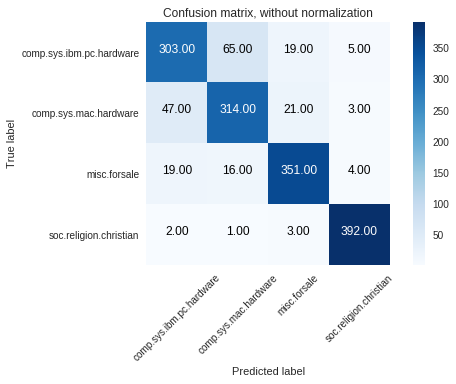

Accuracy =  0.8690095846645367
Precision =  0.867700214272799
Recall =  0.8683670555933658
F1 Score =  0.8678237184441725


In [0]:
#Create y for training and testing
print(train_dataset_2.target.shape)
y_train_multiclass = train_dataset_2.target
y_test_multiclass = test_dataset_2.target


#Grid search for best C in multiclass linear SVM using one vs rest technique with precision and recall as macro
from sklearn.multiclass import OneVsRestClassifier
parameters_svm = {"estimator__C":[10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3]}#{"C":[10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3]}#
print(parameters_svm)
grid_svm_ovr = OneVsRestClassifier(LinearSVC(max_iter = 20000))#LinearSVC(max_iter = 10000, multi_class= 'ovr')#
grid_svm_clf_ovr = GridSearchCV(grid_svm_ovr, parameters_svm, cv=5, scoring = 'accuracy')
grid_svm_clf_ovr.fit(X_train_reduced_lsi2, y_train_multiclass)
print(grid_svm_clf_ovr.best_params_)

best_param_svm_ovr_predict = grid_svm_clf_ovr.predict(X_test_reduced_lsi2)
cnf_matrix = confusion_matrix(y_test_multiclass, best_param_svm_ovr_predict)
plt.figure()
plot_confusion_matrix(cnf_matrix, train_dataset_2.target_names,
                      title='Confusion matrix, without normalization')
plt.show()

accuracy_best_param_ovr = accuracy_score(y_test_multiclass,best_param_svm_ovr_predict)
precision_best_param_ovr = precision_score(y_test_multiclass,best_param_svm_ovr_predict, average = 'macro')
recall_best_param_ovr = recall_score(y_test_multiclass,best_param_svm_ovr_predict, average = 'macro')
f1_best_param_ovr = f1_score(y_test_multiclass,best_param_svm_ovr_predict, average = 'macro')

print('Accuracy = ', accuracy_best_param_ovr)
print('Precision = ', precision_best_param_ovr)
print('Recall = ', recall_best_param_ovr)
print('F1 Score = ' ,f1_best_param_ovr)

{'estimator__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


{'estimator__C': 10}


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


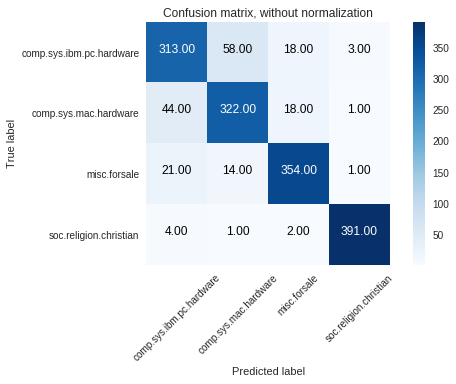

Accuracy =  0.8817891373801917
Precision =  0.8812491407574865
Recall =  0.8812343480281384
F1 Score =  0.8811710123051533


In [0]:
#Grid search for best C in multiclass linear SVM using one vs rest technique with precision and recall as macro
from sklearn.multiclass import OneVsOneClassifier
parameters_svm = {"estimator__C":[10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3]}#{"C":[10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3]}#
print(parameters_svm)
grid_svm_ovo = OneVsOneClassifier(LinearSVC(max_iter = 20000))#LinearSVC(max_iter = 10000, multi_class= 'ovr')#
grid_svm_clf_ovo = GridSearchCV(grid_svm_ovo, parameters_svm, cv=5, scoring = 'accuracy')
grid_svm_clf_ovo.fit(X_train_reduced_lsi2, y_train_multiclass)
print(grid_svm_clf_ovo.best_params_)

best_param_svm_ovo_predict = grid_svm_clf_ovo.predict(X_test_reduced_lsi2)
cnf_matrix = confusion_matrix(y_test_multiclass, best_param_svm_ovo_predict)
plt.figure()
plot_confusion_matrix(cnf_matrix, train_dataset_2.target_names,
                      title='Confusion matrix, without normalization')
plt.show()

accuracy_best_param_ovo = accuracy_score(y_test_multiclass,best_param_svm_ovo_predict)
precision_best_param_ovo = precision_score(y_test_multiclass,best_param_svm_ovo_predict, average = 'macro')
recall_best_param_ovo = recall_score(y_test_multiclass,best_param_svm_ovo_predict, average = 'macro')
f1_best_param_ovo = f1_score(y_test_multiclass,best_param_svm_ovo_predict, average = 'macro')

print('Accuracy = ', accuracy_best_param_ovo)
print('Precision = ', precision_best_param_ovo)
print('Recall = ', recall_best_param_ovo)
print('F1 Score = ' ,f1_best_param_ovo)


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


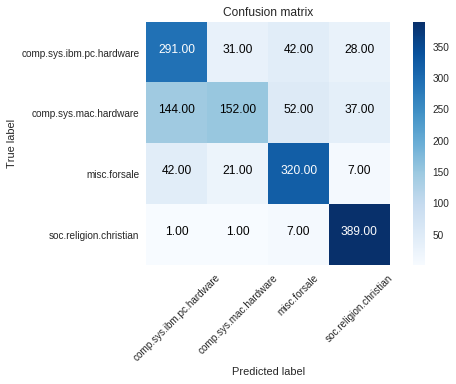

0.7361022364217252
0.7385407062019868
0.7337629721917232
0.7197683150959924


In [0]:
#multiclass Gaussian Naive Bayes with precision and recall as macro
gaussianNB_clf_multiclass = GaussianNB()
gaussianNB_clf_multiclass.fit(X_train_reduced_lsi2, y_train_multiclass)
predicted_gaussianNB_multiclass = gaussianNB_clf_multiclass.predict(X_test_reduced_lsi2)

cnf_matrix = confusion_matrix(y_test_multiclass, predicted_gaussianNB_multiclass)
plt.figure()
plot_confusion_matrix(cnf_matrix, train_dataset_2.target_names,
                      title='Confusion matrix')
plt.show()

accuracy_gaussianNB_multiclass = accuracy_score(y_test_multiclass,predicted_gaussianNB_multiclass)
precision_gaussianNB_multiclass = precision_score(y_test_multiclass,predicted_gaussianNB_multiclass, average= 'macro')
recall_gaussianNB_multiclass = recall_score(y_test_multiclass,predicted_gaussianNB_multiclass, average = 'macro')
f1_gaussianNB_multiclass = f1_score(y_test_multiclass,predicted_gaussianNB_multiclass, average = 'macro')

print(accuracy_gaussianNB_multiclass)
print(precision_gaussianNB_multiclass)
print(recall_gaussianNB_multiclass)
print(f1_gaussianNB_multiclass)
